In [39]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("European_citiznes_rsvp_eu_clean.csv")
df.head()

,COUNTRY,YEAR,SEX,circulatory_diseases,youth_unemployment_rate,gross_national_income,unemployment_rate,regular_daily_smokers,average_fruit_vegtable_ppd,fat_available_ppd,adult_overweight,self_injury,average_number_of_calories_available_per_person_per_day,Ischaemic_heart_diseas,life_expectancy,alcahol_consumption_liter_per_capita,protein_ppd
0,Austria,1991.0,ALL,3051.58,3.72,21810.0,3.46,27.5,209.10,159.23,40.09,1.25,3556.0,38.53,75.95,14.10,103.15
1,Austria,1992.0,ALL,3002.43,4.13,24520.0,3.61,35.0,212.51,161.42,40.40,1.44,3546.0,37.38,76.13,13.60,103.95
2,Austria,1995.0,ALL,2844.85,5.91,28190.0,3.66,24.0,200.16,152.79,41.33,1.04,3510.0,35.48,76.97,13.40,100.54
3,Austria,1999.0,ALL,2646.71,5.93,27080.0,3.72,36.3,205.56,157.23,42.58,0.83,3673.0,30.69,78.13,12.80,105.49
4,Austria,2006.0,ALL,1834.76,9.75,41500.0,5.30,23.2,238.95,162.30,44.27,0.79,3719.0,18.06,80.19,12.58,101.46


In [41]:
# filterByYear = df[df["YEAR"]==2000]
filterByYear = df
filterByYear[["COUNTRY","YEAR","life_expectancy"]].head()

,COUNTRY,YEAR,life_expectancy
0,Austria,1991.0,75.95
1,Austria,1992.0,76.13
2,Austria,1995.0,76.97
3,Austria,1999.0,78.13
4,Austria,2006.0,80.19


In [42]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["life_expectancy","life_expectancy"]])
kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[77.48924658, 77.48924658],
       [72.27090909, 72.27090909],
       [81.37065693, 81.37065693]])

In [43]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["YEAR","life_expectancy"]])
y_pred.predict(filterByYear[["YEAR","life_expectancy"]])
filterByYear["cluster"] = y_pred.labels_
filterByYear[["COUNTRY","YEAR","life_expectancy","cluster"]].head()

y_pred.cluster_centers_[:,1]
# y_pred.labels_

array([75.7476    , 80.63785714, 78.01515873])

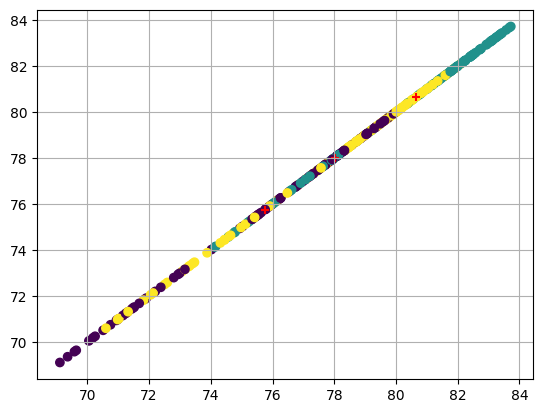

In [44]:
fig, ax = plt.subplots()
ax.scatter(filterByYear["life_expectancy"], filterByYear["life_expectancy"], c=filterByYear["cluster"])
ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
ax.grid(True)

plt.show()

In [45]:
forExport = filterByYear
labels = ['LOW','MEDIUM','HIGH']

def clusterToLabel(centers):
    labelMap = []
    # for c in arr:
    # centers = np.array([2.5, -1.2, 0.7])  # cluster 0,1,2
    sorted_labels = np.argsort(centers)       # array([1,2,0]) low->high
    rank_map = {int(lbl): rank for rank, lbl in enumerate(sorted_labels, start=0)}  # {1:1,2:2,0:3}
    # labels: array of shape (n_samples,) with cluster ids
    labels = np.array([0,0,1,2,1,2])
    # print(rank_map)
    return rank_map

clusterToLabel([0.5, 3, 2])

{0: 0, 2: 1, 1: 2}

circulatory_diseases


/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


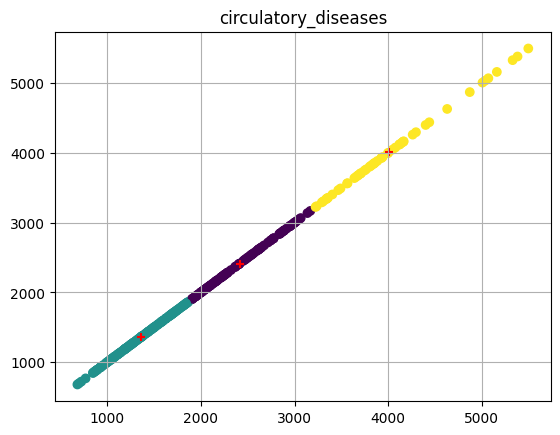

youth_unemployment_rate


/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


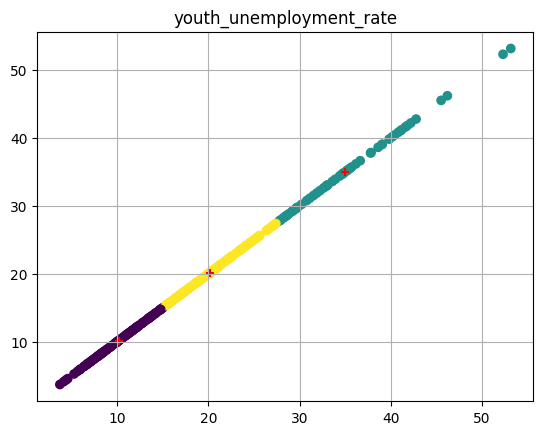

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


gross_national_income


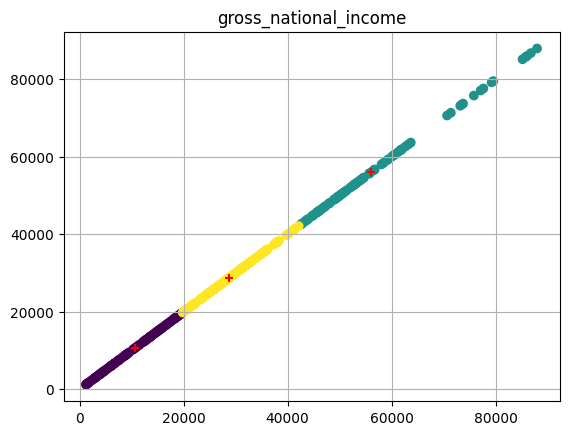

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


unemployment_rate


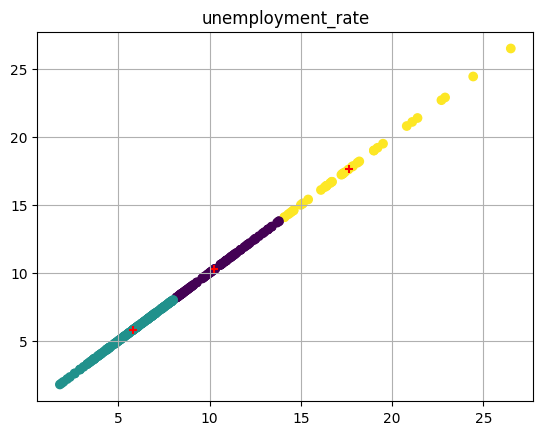

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


regular_daily_smokers


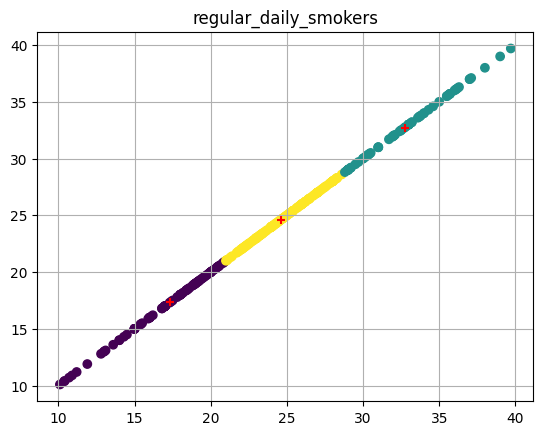

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


average_fruit_vegtable_ppd


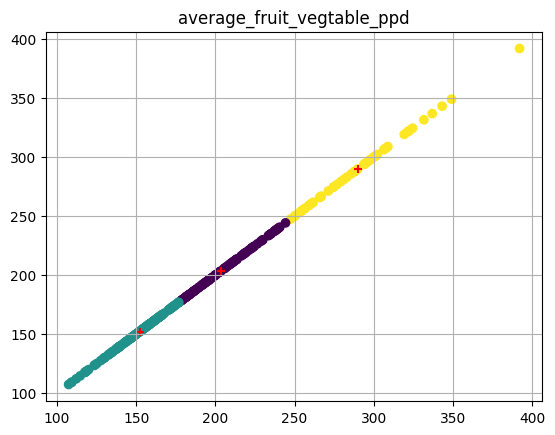

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


fat_available_ppd


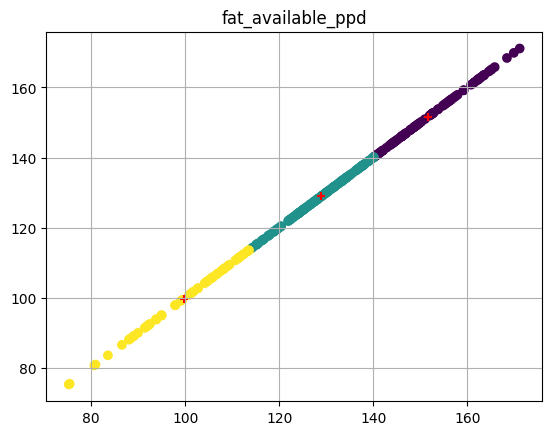

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


adult_overweight


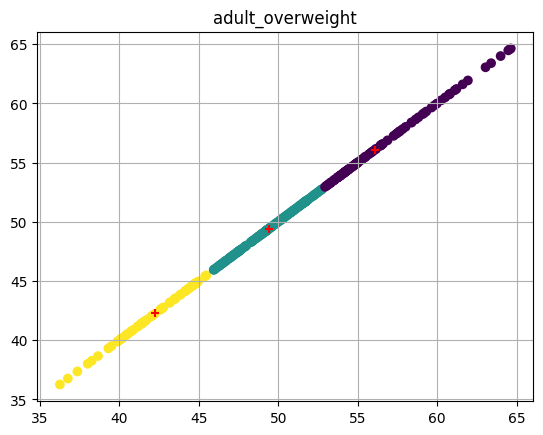

self_injury


/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


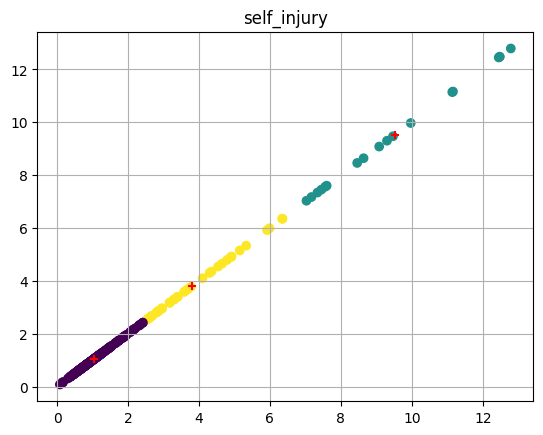

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


average_number_of_calories_available_per_person_per_day


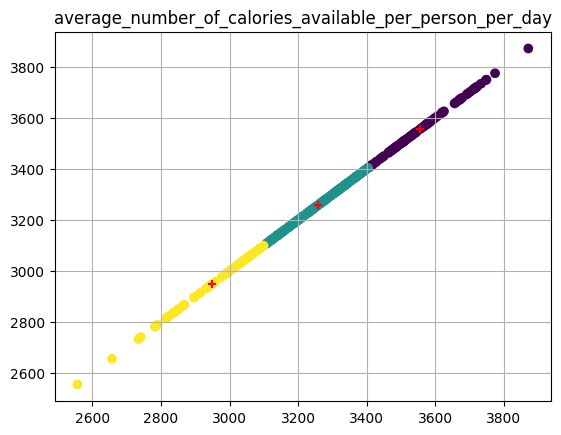

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ischaemic_heart_diseas


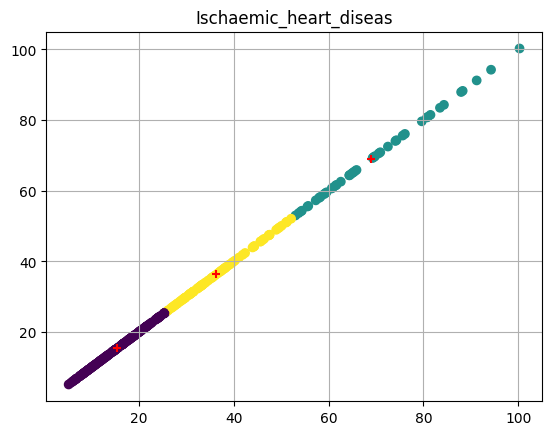

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


life_expectancy


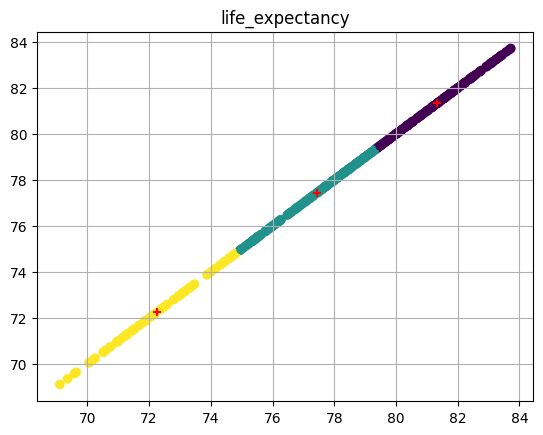

alcahol_consumption_liter_per_capita


/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


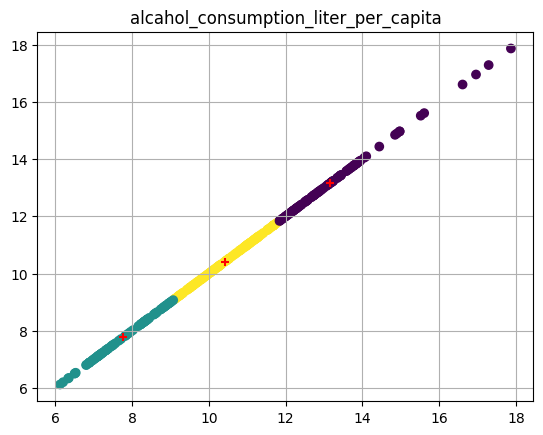

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


protein_ppd


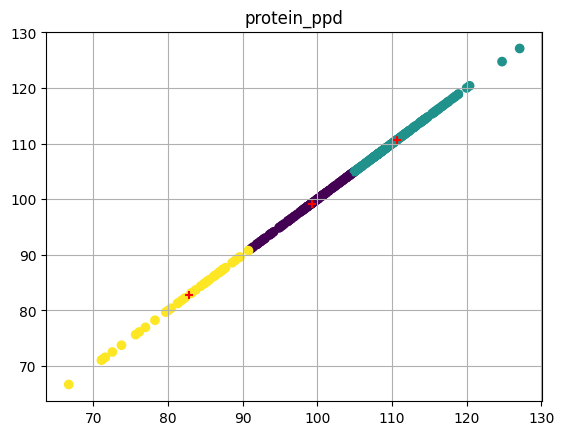

cluster


/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


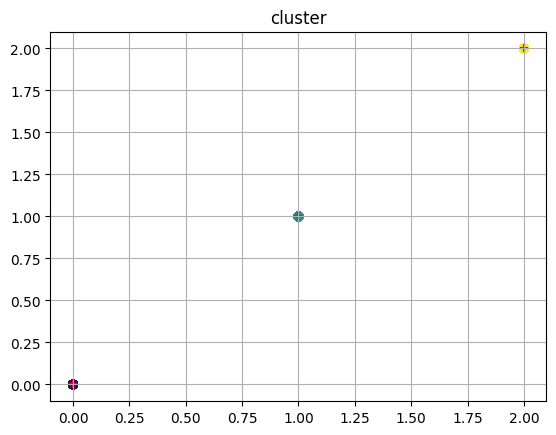

/tmp/ipykernel_2079/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]


,COUNTRY,YEAR,SEX,circulatory_diseases,youth_unemployment_rate,gross_national_income,unemployment_rate,regular_daily_smokers,average_fruit_vegtable_ppd,fat_available_ppd,adult_overweight,self_injury,average_number_of_calories_available_per_person_per_day,Ischaemic_heart_diseas,life_expectancy,alcahol_consumption_liter_per_capita,protein_ppd,cluster
0,Austria,1991.0,ALL,MEDIUM,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,HIGH,LOW,LOW,HIGH,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW
1,Austria,1992.0,ALL,MEDIUM,LOW,MEDIUM,LOW,HIGH,MEDIUM,HIGH,LOW,LOW,HIGH,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW
2,Austria,1995.0,ALL,MEDIUM,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,HIGH,LOW,LOW,HIGH,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW
3,Austria,1999.0,ALL,MEDIUM,LOW,MEDIUM,LOW,HIGH,MEDIUM,HIGH,LOW,LOW,HIGH,MEDIUM,MEDIUM,HIGH,HIGH,MEDIUM
4,Austria,2006.0,ALL,LOW,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,HIGH,LOW,LOW,HIGH,LOW,HIGH,HIGH,MEDIUM,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Sweden,2015.0,ALL,LOW,MEDIUM,HIGH,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW,MEDIUM,LOW,HIGH,LOW,HIGH,MEDIUM
334,Sweden,2016.0,ALL,LOW,MEDIUM,HIGH,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW,MEDIUM,LOW,HIGH,LOW,HIGH,MEDIUM
335,Sweden,2017.0,ALL,LOW,MEDIUM,HIGH,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW,MEDIUM,LOW,HIGH,LOW,HIGH,MEDIUM
336,Sweden,2018.0,ALL,LOW,MEDIUM,HIGH,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW,MEDIUM,LOW,HIGH,LOW,HIGH,MEDIUM


In [46]:
for series_name, series in df.items():
    if series_name == "COUNTRY" or series_name == "SEX" or series_name == "YEAR":
        continue
    print(series_name)
    y_pred = KMeans(n_clusters=3).fit(filterByYear[[series_name,series_name]])
    y_pred.predict(filterByYear[[series_name,series_name]])
    y_pred.cluster_centers_
    filterByYear["cluster"] = y_pred.labels_
    filterByYear[["COUNTRY","YEAR",series_name,"cluster"]].head()

    fig, ax = plt.subplots()
    ax.scatter(filterByYear[series_name], filterByYear[series_name], c=filterByYear["cluster"])
    ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
    ax.grid(True)
    ax.set_title(series_name)

    plt.show()

    relab = clusterToLabel(y_pred.cluster_centers_[:,1])

    for i in range(len(filterByYear[series_name])):
        forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]

forExport

In [ ]:
rename_map = {
    "life_expectancy": "LIFEEXP",
    "average_number_of_calories_available_per_person_per_day": "CALORIES",
    "unemployment_rate": "UNEMP",
    "regular_daily_smokers": "SMOKING",
    "adult_overweight": "OVERWT",
    "alcahol_consumption_liter_per_capita": "ALCOHOL",
    "fat_available_ppd": "FAT",
    "protein_ppd": "PROTEIN",
    "average_fruit_vegtable_ppd": "FRUITVEG",
    "annual_income": "ANNUALINCOME",  
    "youth_unemployment_rate": "YOUTH_UNEMP_RATE",  
    "Ischaemic_heart_diseas": "HEARTDISEAS",  
    "circulatory_diseases": "CIRCULATORYDISEAS",  
    "self_injury": "SELFINJURY",  
    "total_hospital_beds": "TOTALHOSPBED",  
    "gross_national_income": "GROSS_NATIONAL_INCOME"
}

# item_cols = [c+"_bin" for c in cols_to_bin]
# print(item_cols)

forExport = forExport.rename(columns=rename_map)

# df = pd.DataFrame({"z":["a","a"], "zz":["b","c"]}, index=[1,2])

# Option 1 — transform all columns to "col=val" strings
# df_transformed = df.apply(lambda col: col.index.map(lambda i, c=col.name: f"{c}={col.loc[i]}"))
# but simpler:
forExport2 = forExport.apply(lambda col: col.map(lambda v, name=col.name: f"{name}={v}")).copy()

print(forExport2)

# 1 transaction = one (COUNTRY, YEAR)
tx_df = (forExport2.sort_values(["COUNTRY","YEAR"])
           .drop_duplicates(subset=["COUNTRY","YEAR"]))


transactions = forExport2#tx_df.apply(row_to_items, axis=1).tolist()
transactions = transactions.drop(columns=["COUNTRY","YEAR","SEX","cluster"])
num_records = len(transactions)
# print(transactions)
print("Transactions:", num_records)

pd.DataFrame(transactions).to_csv("rules_stat_cluster_new.csv", index=False)

             COUNTRY         YEAR      SEX         CIRCULATORYDISEAS  \
0    COUNTRY=Austria  YEAR=1991.0  SEX=ALL  CIRCULATORYDISEAS=MEDIUM   
1    COUNTRY=Austria  YEAR=1992.0  SEX=ALL  CIRCULATORYDISEAS=MEDIUM   
2    COUNTRY=Austria  YEAR=1995.0  SEX=ALL  CIRCULATORYDISEAS=MEDIUM   
3    COUNTRY=Austria  YEAR=1999.0  SEX=ALL  CIRCULATORYDISEAS=MEDIUM   
4    COUNTRY=Austria  YEAR=2006.0  SEX=ALL     CIRCULATORYDISEAS=LOW   
..               ...          ...      ...                       ...   
333   COUNTRY=Sweden  YEAR=2015.0  SEX=ALL     CIRCULATORYDISEAS=LOW   
334   COUNTRY=Sweden  YEAR=2016.0  SEX=ALL     CIRCULATORYDISEAS=LOW   
335   COUNTRY=Sweden  YEAR=2017.0  SEX=ALL     CIRCULATORYDISEAS=LOW   
336   COUNTRY=Sweden  YEAR=2018.0  SEX=ALL     CIRCULATORYDISEAS=LOW   
337   COUNTRY=Sweden  YEAR=2019.0  SEX=ALL     CIRCULATORYDISEAS=LOW   

            YOUTH_UNEMP_RATE         GROSS_NATIONAL_INCOME      UNEMP  \
0       YOUTH_UNEMP_RATE=LOW  GROSS_NATIONAL_INCOME=MEDIUM  UN

In [55]:
tt = forExport2
tt.loc[tt['COUNTRY'] == "COUNTRY=Denmark"]

,COUNTRY,YEAR,SEX,CIRCULATORYDISEAS,YOUTH_UNEMP_RATE,GROSS_NATIONAL_INCOME,UNEMP,SMOKING,FRUITVEG,FAT,OVERWT,SELFINJURY,CALORIES,HEARTDISEAS,LIFEEXP,ALCOHOL,PROTEIN,cluster
58,COUNTRY=Denmark,YEAR=1994.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=MEDIUM,SMOKING=HIGH,FRUITVEG=LOW,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=MEDIUM,LIFEEXP=MEDIUM,ALCOHOL=HIGH,PROTEIN=MEDIUM,cluster=LOW
59,COUNTRY=Denmark,YEAR=1995.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=MEDIUM,SMOKING=HIGH,FRUITVEG=LOW,FAT=HIGH,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=MEDIUM,LIFEEXP=MEDIUM,ALCOHOL=HIGH,PROTEIN=HIGH,cluster=MEDIUM
60,COUNTRY=Denmark,YEAR=1996.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=MEDIUM,SMOKING=HIGH,FRUITVEG=LOW,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=MEDIUM,LIFEEXP=MEDIUM,ALCOHOL=HIGH,PROTEIN=HIGH,cluster=MEDIUM
61,COUNTRY=Denmark,YEAR=1997.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=HIGH,FRUITVEG=MEDIUM,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=HIGH,PROTEIN=MEDIUM,cluster=LOW
62,COUNTRY=Denmark,YEAR=1998.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=HIGH,FRUITVEG=LOW,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=HIGH,cluster=MEDIUM
63,COUNTRY=Denmark,YEAR=1999.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=HIGH,FRUITVEG=MEDIUM,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=MEDIUM,cluster=LOW
64,COUNTRY=Denmark,YEAR=2000.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=HIGH,FRUITVEG=MEDIUM,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=MEDIUM,cluster=LOW
65,COUNTRY=Denmark,YEAR=2001.0,SEX=ALL,CIRCULATORYDISEAS=MEDIUM,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=HIGH,FRUITVEG=MEDIUM,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=HIGH,cluster=MEDIUM
66,COUNTRY=Denmark,YEAR=2002.0,SEX=ALL,CIRCULATORYDISEAS=LOW,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=MEDIUM,FRUITVEG=HIGH,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=HIGH,cluster=MEDIUM
67,COUNTRY=Denmark,YEAR=2003.0,SEX=ALL,CIRCULATORYDISEAS=LOW,YOUTH_UNEMP_RATE=LOW,GROSS_NATIONAL_INCOME=MEDIUM,UNEMP=LOW,SMOKING=MEDIUM,FRUITVEG=MEDIUM,FAT=MEDIUM,OVERWT=LOW,SELFINJURY=LOW,CALORIES=MEDIUM,HEARTDISEAS=LOW,LIFEEXP=MEDIUM,ALCOHOL=MEDIUM,PROTEIN=MEDIUM,cluster=LOW
